<a href="https://colab.research.google.com/github/anniewit/IANNWTF-2020/blob/main/ADNE_TF_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [ ]:
tf.keras.backend.clear_session()


# Tutorial Tensorflow & Keras
#### Learning from Unstructured Data Spring Term 2020
Annemarie Witschas (59051)

### Data
For this tutorial we will implement a neural network to classify images. The dataset we are using is Cifar10, a collection of 60.000 small coloured images consisting of 32x32 pixels. Each image corresponds to one of 10 categories, which can be an animal or a type of vehicle, as we will see below.

The dataset was provided by Alex Krizhevsky in 2009 on https://www.cs.toronto.edu/~kriz/cifar.html.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

These are the categories to which we want to classify the images:

In [ ]:
label_words = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Here are some example images from the dataset:

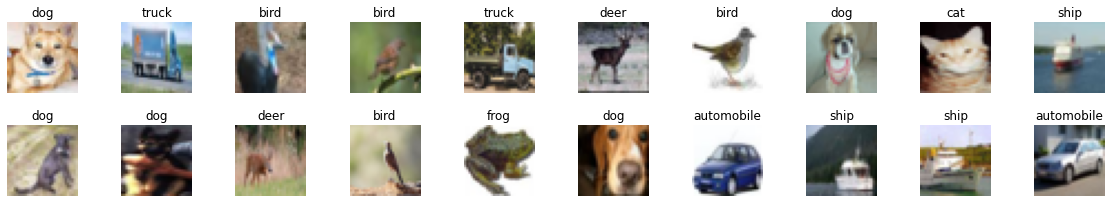

In [ ]:
fig, ax = plt.subplots(2,10,figsize=(16,3))
fig.tight_layout()
ax = ax.flatten()
for i in range(20):
    # Readout an image and the corresponding label.
    index = np.random.randint(train_images.shape[0])
    img = train_images[index]
    lbl = label_words[int(train_labels[index])]
    ax[i].imshow(img)
    ax[i].set_title(lbl)
    ax[i].axis("off")

### Prepare the TensorFlow dataset.

In [ ]:
train_images = np.array(train_images, dtype=np.float32)
test_images = np.array(test_images, dtype=np.float32)
train_images, test_images = train_images / 255.0, test_images / 255.0
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Shuffle the training dataset.
# Use a batchsize of 32 for the training dataset.
# Use full batch for the test dataset/
train_dataset = train_dataset.shuffle(train_images.shape[0]).batch(32)
test_dataset = test_dataset.batch(test_images.shape[0])

# CNN

To classify images with a neural network, we will use a convolutional neural network. These consist of several convolutional layers. In a **Convolutional Layer** we have different kernels which filter for different features in the the image. The activations are derived by calculation the cross-correlation between the original image and the filter. (As the images are coloured, we have 3 dimensions, we will filter for these features in each of the red, blue and green dimension.) The activations of each filter are stored in feature maps. These kernels are the parameters that we are training in a CNN: we want to optimize the filters that we need to find patterns in the data that are responsible for the label.


## Architecture
- Usually CNNs consist of several Convolutional Layers, which are followed by a **MaxPooling Layer**. MaxPooling Layers simply take the highest value in a specified area and thus help to reduce the number of parameters needed. (There are also other ways of joining several entries from a feature map, for instance with average pooling.)


- In the end of our model we will put a classifier, consisting of some **dense** (or feed-forward) layers.

### Additional elements:
- Further we will use **BatchNormalization** after each layer. By standardizing the activations after each layer, BatchNorm works as an *optimizer* that helps to minimize the loss function more effectively.

- In the Dense layers we will also use **Dropout**. This sets some of the weights randomly to zero. This way, it is harder for the model to "learn examples by hard" (i.e. to encode them in a certain pattern over the network). Instead it has to learn patterns from the data, which reduces the chance of overfitting and thus functions as a *regularizer*. 


## Sequential Model

In [ ]:
seq_model = keras.Sequential()

seq_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
seq_model.add(layers.MaxPooling2D((2, 2)))
seq_model.add(layers.BatchNormalization())

seq_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
seq_model.add(layers.MaxPooling2D((2, 2)))
seq_model.add(layers.BatchNormalization())

seq_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
seq_model.add(layers.MaxPooling2D((2, 2)))
seq_model.add(layers.BatchNormalization())

seq_model.add(layers.Flatten())

seq_model.add(layers.Dense(128, activation='relu'))
seq_model.add(layers.Dropout(0.25))
seq_model.add(layers.BatchNormalization())

seq_model.add(layers.Dense(256, activation='relu'))
seq_model.add(layers.Dropout(0.25))
seq_model.add(layers.BatchNormalization())

seq_model.add(layers.Dense(512, activation='relu'))
seq_model.add(layers.Dropout(0.25))
seq_model.add(layers.BatchNormalization())

seq_model.add(layers.Dense(1024, activation='relu'))
seq_model.add(layers.Dropout(0.25))
seq_model.add(layers.BatchNormalization())

seq_model.add(layers.Dense(10))

We will use SparseCtaegoricalCrossentropy as **loss function**, since we have the labels as singular digits.

In [ ]:
seq_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

seq_history = seq_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.7245 - accuracy: 0.4048 - val_loss: 1.3526 - val_accuracy: 0.5261
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2245 - accuracy: 0.5734 - val_loss: 1.0629 - val_accuracy: 0.6282
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0051 - accuracy: 0.6555 - val_loss: 1.0724 - val_accuracy: 0.6458
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8573 - accuracy: 0.7098 - val_loss: 0.8415 - val_accuracy: 0.7116
Epoch 5/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7501 - accuracy: 0.7484 - val_loss: 1.0035 - val_accuracy: 0.6662
Epoch 6/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.6588 - accuracy: 0.7794 - val_loss: 0.7168 - val_accuracy: 0.7528
Epoch 7/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.5802 - accuracy: 0.8054 - val_loss: 0.8371 -

To see how the model performed we can use the **history** object that model.fit() returns, which holds the entries of the losses and accuracies.




In [ ]:
def plot_acc_loss(hist):
    """Function to ease plotting of loss and accuracy"""
    plt.figure(figsize=(16, 4))

    # plotting accuracies
    plt.subplot(121)
    plt.title('Accuracy', fontsize=20)
    plt.plot(hist['accuracy'], label='train_accuracy')
    plt.plot(hist['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # plotting losses
    plt.subplot(122)
    plt.title('Loss', fontsize=20)
    plt.plot(hist['loss'], label='train_loss')
    plt.plot(hist['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

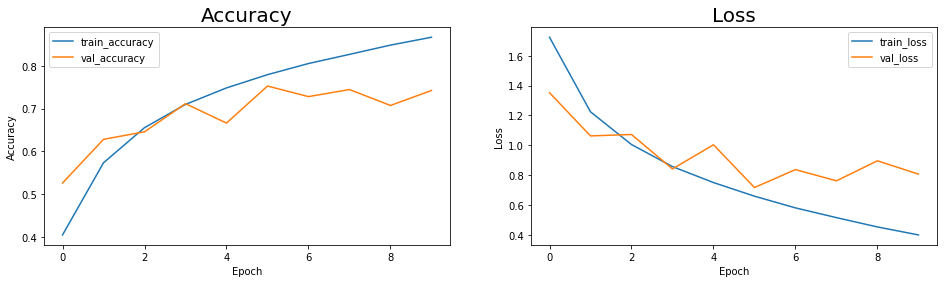

In [ ]:
plot_acc_loss(seq_history.history)

We can see that our model is **overfitting**: the training accuracy is higher than the validation accuracy. One way to improve this would be **Data Augmentation**: we would slightly alter the orientation of the images in order to get more training examples, so that the model cannot learn the examples we have "by heart". For this dataset it would be suitable to flip the images (left/right), the objects should still be detectable. For numbers or letters however, flipping the image could change the content of the image.

#### To get a feeling for how our model performs, we can have a look at some examples from the test data set. 
First we calculate the predictions for the train images:

In [ ]:
probability_model = tf.keras.Sequential([seq_model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


The following two functions will ease the plotting:


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  """Plots original image that is indicated by the index with its predicted label and its original label.
  Label correct predictions in blue and incorrect predictions in red."""
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(label_words[predicted_label], 100*np.max(predictions_array),
                                label_words[int(true_label)]), color=color)

def plot_value_array(i, predictions_array, true_label):
  """Plots the distribution of the prediction for indicated index
  Color correct predictions in blue and incorrect predictions in red."""
  predictions_array, true_label = predictions_array, int(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[int(predicted_label)].set_color('red')
  thisplot[true_label].set_color('blue')


Now we plot some random test images, their predicted labels, their true labels and the distribution of the predictions for this image.


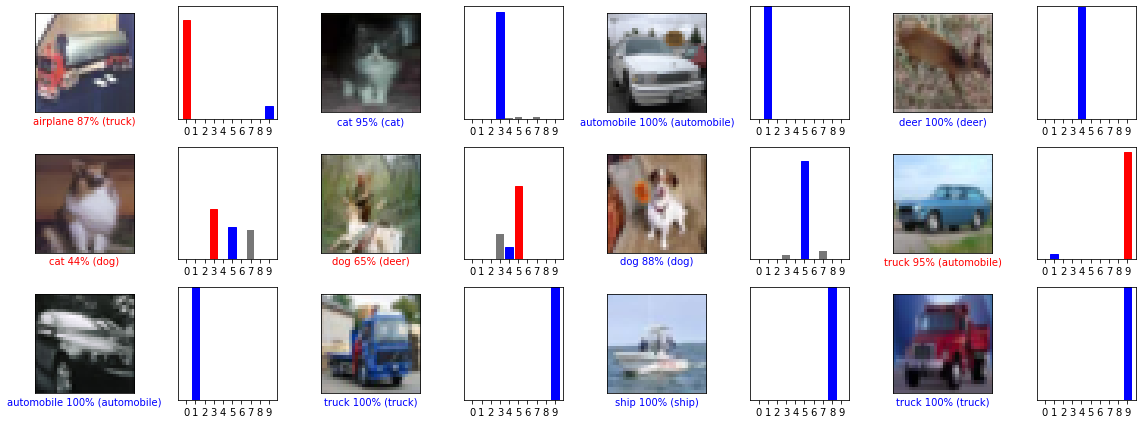

In [ ]:
num_rows = 3
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  index = np.random.randint(test_images.shape[0])
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(index, predictions[index], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(index, predictions[index], test_labels)
plt.tight_layout()
plt.show()


Although the network still makes a good amount of mistakes when classifying, we have to admit that the quality of the pictures is really limited and that probably humans also would not always be able to tell the difference between a 32x32 dog or cat.




---



## Functional Model
Now we are going to move to a different part of the tf.keras API which offers a more flexible way to implement networks than the Sequential API.

This time, the architecture will be a bit simpler than the one from the first model:

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))

x = Conv2D(32, 3, activation='relu')(inputs)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Flatten()(x)
x = Dense(units=64, activation='relu')(x)
x = Dropout(0.25)(x)

output = Dense(units=10, activation='softmax')(x)

This time, we will use **one-hot-encoding** on the labels, that means instead of e.g. label $9$ we will have label $[0,0,0,0,0,0,0,0,0,1]$.

In [ ]:
train_labels_1hot = tf.squeeze(tf.one_hot(train_labels, depth = 10))
test_labels_1hot = tf.squeeze(tf.one_hot(test_labels, depth = 10))

With clear_session() we remove what is stored from previous models, so that we free memory and speed up the computations.

In [ ]:
tf.keras.backend.clear_session()


We can compile and fit the functional model just like the sequential model.

As we are now using one-hot-encoding for the labels, we will use **Categorical Crossentropy** as loss function.

In [ ]:
func_model = keras.Model(inputs=inputs, outputs=output)

func_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

func_history = func_model.fit(train_images, train_labels_1hot, epochs=15, 
                    validation_data=(test_images, test_labels_1hot))


Epoch 1/15
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1118 - accuracy: 0.3416 - val_loss: 2.0203 - val_accuracy: 0.4354
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0116 - accuracy: 0.4451 - val_loss: 1.9557 - val_accuracy: 0.5049
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9714 - accuracy: 0.4881 - val_loss: 1.9261 - val_accuracy: 0.5335
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9411 - accuracy: 0.5175 - val_loss: 1.9220 - val_accuracy: 0.5376
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9184 - accuracy: 0.5424 - val_loss: 1.8754 - val_accuracy: 0.5849
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9024 - accuracy: 0.5563 - val_loss: 1.8769 - val_accuracy: 0.5819
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8850 - accuracy: 0.5752 - val_loss: 1.8511 - val_accurac

Plotting the performance of our model:

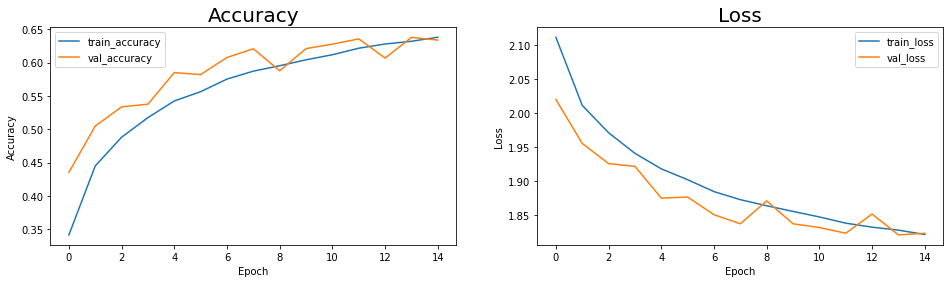

In [ ]:
plot_acc_loss(func_history.history)

#### Saving parameters
We can also save the parameters of our model so we can reload it the next time we want to use it again:

In [ ]:
seq_model.save_weights('cifar10_model.h5')



---

## Build our own Subclass

Another way to implement neural networks with the tf.keras API is to build a class ourselves. These classes usually need a **init()** function that calls the Superconstructor and defines the layers and a **call()** function that specifies in which order the layers should be called. To make it easier, we have just put all layers in a list and we will call them consecutively. 

#### Define the Model class

In [ ]:
from tensorflow.keras.layers import Layer


class Model(Layer):
    
    def __init__(self):
        super(Model, self).__init__()
        # Initialize all layers.
        self.layers = [
          tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
          tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
          tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
          tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
          tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units=64, activation='relu'),
          tf.keras.layers.Dense(units=10, activation='softmax')
        ]
        
    def call(self, x):
        # Define the model.
        for layer in self.layers:
          x = layer(x)
        return x

#### Train the model.
Here, we are using a for-loop to run through the epochs and we will calculate the gradients ourselves by calling GradientTape(). This is already done by tensorflow when we call model.fit()

In [ ]:
tf.keras.backend.clear_session()
# Initialize model, loss (categorical cross entropy) and optimizer (Adam with default params).
func_model = Model()
cce = tf.losses.CategoricalCrossentropy()
optimizer = tf.optimizers.Adam()

def accuracy(y_true, y_pred):
  # return the accuracy of the prediction y_pred
  return tf.reduce_mean(tf.cast(tf.argmax(y_true, axis=1) == tf.argmax(y_pred, axis=1), tf.float32))

# Initialize lists for later visualiztion
train_steps = []
train_losses = []
train_accuracies = []
test_steps = []
test_losses = []
test_accuracies = []
step = 0

for epoch in range(5):

    for (x, t) in train_dataset:
        
        t = tf.reshape(t, shape=[-1])
        
        # Turn the labels into one-hot vectors.
        t = tf.one_hot(t, depth=10)

        # Perform a training step.
        with tf.GradientTape() as tape:
          output = func_model(x)
          loss = cce(t, output)
          gradients = tape.gradient(loss, func_model.trainable_variables)

        optimizer.apply_gradients(zip(gradients, func_model.trainable_variables))

        # Calculate the training accuracy every 25 steps.
        if step % 25 == 0:
          train_losses.append(loss)
          train_accuracies.append(accuracy(t, output))
          train_steps.append(step)
        
        # Calculate the test loss and accuracy every 50 steps.
        if step % 50 == 0:
          for (x, t) in test_dataset:
            # Reshape labels into a vector
            t = tf.reshape(t, shape=[-1])
            # Turn the labels into one-hot vectors.
            t = tf.one_hot(t, depth=10)

            output = func_model(x)
            test_losses.append(cce(t, output))
            test_accuracies.append(accuracy(t, output))
            test_steps.append(step)
        
        step += 1

Once again, we will have a look on how the model was training.

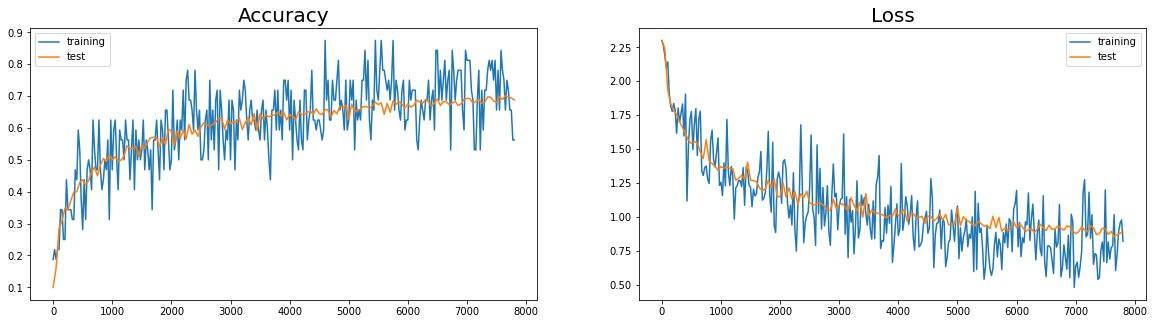

In [ ]:
plt.figure(figsize=(20, 5))

# plotting accuracies
plt.subplot(121)
plt.title('Accuracy', fontsize=20)
plt.plot(train_steps, train_accuracies, label='training')
plt.plot(test_steps, test_accuracies, label='test')
plt.legend()

# plotting losses
plt.subplot(122)
plt.title('Loss', fontsize=20)
plt.plot(train_steps, train_losses, label='training')
plt.plot(test_steps, test_losses, label='test')
plt.legend()

plt.show()